#           ЛАБОРАТОРНАЯ РАБОТА 3     
##                                                                             Ремизов А-05-20          
## Вариант 22
                
## РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ

#### Задача 3.1.
Реализовать решение СЛАУ с помощью LU разложения и LU разложения по схеме частичного выбора. Решить систему небольшой размерности с возмущенной матрицей обоими методами, оценить погрешность и сравнить с теоретической оценкой. Проанализировать поведение  методов с ростом числа уравнений.

### ПОРЯДОК  РЕШЕНИЯ  ЗАДАЧИ.
1. Реализовать метод решения СЛАУ с помощью $LU$ разложения в виде, указанном в приложении. Убедиться в его работоспособности.
2. Реализовать метод решения СЛАУ с помощью $LU$ разложения по схеме частичного выбора в виде, указанном в приложении. Убедиться в его работоспособности.
2*. Реализовать метод решения СЛАУ с помощью $LU$ разложения по схеме частичного выбора без перестановки строк в виде, указанном в приложении. Убедиться в его работоспособности.
3. Решить систему $A^{*}x=b$ , размера 5x5, двумя методами. Вектор $b$ задается как $b=Ax$, где $x_i=N$, $N$ -- номер варианта. Матрицу $A^*_{ij}$ задать как $A_{ij}$ и к одному элементу прибавить $10^{-3}$.
4. Вычислить погрешность и сравнить ее с теоретической оценкой. Для вычисления обратной матрицы можно воспользоваться встроенными функциями.
5. Задавая вектор $b$ как $b=Ax$, где $x_i=N$, решить систему обоими методам для размера матрицы $n=5,...,15$.
6. Построить на одном графике погрешности обоих методов как функций, зависящих от $n$. Прокомментировать полученный результат.

Решение с помощью LU реализовано в виде двух функций, одна из которых возвращает две матрицы – L и U, не модифицируя A, а вторая функция решает систему; решение с помощью LU по схеме частичного выбора модифицирует исходную матрицу А.

$A_{ij}=sin^{20-j}(i+1)$

$LU$ -- разложение не модифицируя А:

In [1]:
import copy
def LU1(A, n):
    L=[]
    U=[]
    for i in range (n):
        L.append([])
        U.append([])
        for j in range (n):
            L[i].append(0)
            U[i].append(0)
    U=copy.deepcopy(A)        
    for i in range (n):
        L[i][i]=1
        for k in range (i, n-1):
            M=U[k+1][i]/U[i][i]
            L[k+1][i]=M
            for j in range (n):
                
                U[k+1][j]=U[k+1][j]-U[i][j]*M
  
    return L, U

def Sol1(A, n, b):
    L, U = LU1(A,n)
    
    OutputM(L, n)
    OutputM(U, n)
    
    y=[0]*n
    y[0]=copy.copy(b[0])
    
    for i in range (1, n):
        s=0
        for j in range(i):
            s+=y[j]*L[i][j]
        y[i]=b[i]-s
         
    x=[0]*n
    x[n-1]=y[n-1]/U[n-1][n-1]
    
    for i in range (n-2, -1, -1):
        s=0 
        for j in range (n-1, i, -1):
            s+=x[j]*U[i][j]            
            
        x[i]=(y[i]-s)/U[i][i]
    return [x]

n=4
    
A=[[-1, 1, -7, 1], 
   [2, -12, 4, 7], 
   [1, -71, -71, 62], 
   [5, 75, 187, -85]]

b=[20, -180, -976, 884]






def OutputM (A, n):
    for i in range (n):
        print (A[i])
    print('\n')



Sol1(A, n, b)

OutputM(A, n)

[1, 0, 0, 0]
[-2.0, 1, 0, 0]
[-1.0, 7.0, 1, 0]
[-5.0, -8.0, -9.0, 1]


[-1, 1, -7, 1]
[0.0, -10.0, -10.0, 9.0]
[0.0, 0.0, -8.0, 0.0]
[0.0, 0.0, 0.0, -8.0]


[-1, 1, -7, 1]
[2, -12, 4, 7]
[1, -71, -71, 62]
[5, 75, 187, -85]




$LU$ -- разложение по схеме частичного выбора, модифицируя А:

In [2]:
def LU2(A, n):
    for i in range (n):
        for k in range (i, n-1):
            if(abs(A[k][i])>abs(A[i][i])):
                buf=A[k]
                A[k]=A[i]
                A[i]=buf
                
            M=A[k+1][i]/A[i][i]
            A[k+1][i]=M
            for j in range (n):
                A[k+1][j]=A[k+1][j]-A[i][j]*M

    return A

def Sol2(A, n, b):
    A = LU2(A,n)
    
    OutputM(A, n)
    
    y=[0]*n
    y[0]=copy.copy(b[0])
    
    for i in range (1, n):
        s=0
        for j in range(i):
            s+=y[j]*A[i][j]
        y[i]=b[i]-s
         
    x=[0]*n
    x[n-1]=y[n-1]/A[n-1][n-1]
    
    for i in range (n-2, -1, -1):
        s=0 
        for j in range (n-1, i, -1):
            s+=x[j]*A[i][j]            
            
        x[i]=(y[i]-s)/A[i][i]
    return [x]



Sol2(A, n, b)

OutputM(A, n)

[-4.0, -10.0, -10.0, 9.0]
[-1, 1, -7, 1]
[-74.75, 0.0, -588.0, 137.75]
[-21.551020408163268, 0.0, -613.0408163265306, 7.122448979591837]


[-4.0, -10.0, -10.0, 9.0]
[-1, 1, -7, 1]
[-74.75, 0.0, -588.0, 137.75]
[-21.551020408163268, 0.0, -613.0408163265306, 7.122448979591837]




$LU$ разложения по схеме частичного выбора без перестановки строк, модифицируя А (строки не пересталяются, $M=\frac{A[k][i]}{buf[i]}$, где buf -- строка с наибольшим ведущим элементом)

In [3]:
A=[[-1, 1, -7, 1], 
   [2, -12, 4, 7], 
   [1, -71, -71, 62], 
   [5, 75, 187, -85]]

def LU2_1(A, n):       
    for i in range (n):
        for k in range (i, n-1):
            buf=A[i]
            if (abs(A[k][i]) > abs(buf[i])):
                buf=A[k]
            
            M=A[k+1][i]/buf[i]
            A[k+1][i]=M
            for j in range (n):
                
                A[k+1][j]=A[k+1][j]-A[i][j]*M
    
    return A

def Sol2_1(A, n, b):
    A = LU2_1(A,n)
    
    OutputM(A, n)
    
    y=[0]*n
    y[0]=copy.copy(b[0])
    
    for i in range (1, n):
        s=0
        for j in range(i):
            s+=y[j]*A[i][j]
        y[i]=b[i]-s
         
    x=[0]*n
    x[n-1]=y[n-1]/A[n-1][n-1]
    
    for i in range (n-2, -1, -1):
        s=0 
        for j in range (n-1, i, -1):
            s+=x[j]*A[i][j]            
            
        x[i]=(y[i]-s)/A[i][i]
    return [x]

Sol2_1(A, n, b)

[-1, 1, -7, 1]
[-4.0, -10.0, -10.0, 9.0]
[27.8, 77.825, -2.0, -1.4250000000000043]
[2249.7964664310957, 6326.0074204947, -243.41920976549955, -204.87565049791232]




[[-53279.148350546544,
  -13471.621936217916,
  4212.670157863744,
  -10298.835309282416]]

Подпрограмма для заполнения матрицы $A$ и ветора $b$; <br>
$A1$ -- матрица, к элементу которой добавили $10^{-3}$ <br>
Решение системы первым способом:

In [4]:
import math as m

def AbInput(A, n, b):
    for i in range(n):
        A.append([])
        for j in range(n):
            A[i].append((m.sin(i+1))**(20-j))
            b[i]+=A[i][j]*22
    return A, b

n=5
A=[]
b=[0]*n
A1, b1= AbInput(A, n, b)

A0=copy.deepcopy(A1)
b0= copy.deepcopy(b1)

A1[0][0]+=10**(-3)

print("Решение Ax=b:", '\n', '\n')
x0=Sol1(A0, n, b0)
print("x0= ", x0)

print("-----------------------------------------------------------------------------------------------------")

print("Решение A1*x=b:", '\n', '\n')
x1=Sol1(A1, n, b1)
print("x1= ", x1)

Решение Ax=b: 
 

[1, 0, 0, 0, 0]
[4.713422094146163, 1, 0, 0, 0]
[3.097340441240758e-16, -4.372065726411976e-15, 1, 0, 0]
[0.11991353279611226, 0.7202899065939249, 66629444369566.62, 1, 0]
[13.642794745738414, 72.85468526664224, 5964059398317674.0, 86.54566583320995, 1]


[0.03167983484163171, 0.037648160677654335, 0.04474088989087272, 0.053169854574470966, 0.06318679495123575]
[0.0, -0.013236500192331996, -0.030287035386820288, -0.05200185556502682, -0.07940453118543186]
[0.0, 0.0, 3.4643904627815665e-16, 3.2476279415350664e-15, 2.4374280296430787e-14]
[0.0, 0.0, 0.0, -0.19407104030672082, -1.5628470938517527]
[0.0, 1.1102230246251565e-16, 0.0, 0.0, -4.677914741116723]


x0=  [[22.000000000000618, 21.99999999999961, 21.999999999998984, 22.000000000000906, 21.999999999999886]]
-----------------------------------------------------------------------------------------------------
Решение A1*x=b: 
 

[1, 0, 0, 0, 0]
[4.56919180298993, 1, 0, 0, 0]
[3.0025621029703647e-16, -7.45887516968596

Решение системы вторым способом:

In [5]:
n=5
A=[]
b=[0]*n

A2, b2= AbInput(A, n, b)

A2[0][0]+=10**(-3)

x2=Sol2(A2, n, b2)

print("x2= ", x2)

print("x1 = x2: ", x1==x2)

[4.419871369508481, -0.007806495016297238, -0.023834043811270716, -0.0443331519590163, -0.0702910813523859]
[0.0014119975720100456, -0.1281379482132515, 0.012610405311277158, -0.0016463072917312378, 0.020054117564936434]
[0.04009417900152, -0.15629780289020923, 109093565106243.12, -0.31702032970579497, -2.623181321629678]
[-6.796316677952234e-17, 1.7777947157468454e-15, 4.101148390127394e-16, 3.3933274058808886e-15, 2.462444154212703e-14]
[-0.3489881167430055, 4.212910374626353, -0.3700539700832901, -141465499473185.94, 3.9311138801110825]


x2=  [[166186612154.74857, 941461499597.2898, 0.17428673887976015, 6074078185321.382, 6514210544753.9375]]
x1 = x2:  False


Описание функций для вычисления норм, разности матриц и теоретической оценки погрешности решения <br>
***По заданию вектор b задан без погрешности**

In [6]:
import numpy as np


def NormE(M, n, m1):
    s=0
    for i in range(n):
        for j in range(m1):
            s+=(M[i][j])**2
    return s**(1/2)

def DifM(A, B, n, m1):
    C=[]
    for i in range (n):
        C.append([])
        for j in range (m1):
            C[i].append(0)
    
    for i in range(n):
        for j in range (m1):
            C[i][j]=A[i][j]-B[i][j]
    return C

def Pogr(A, A1, n):
    A_inv=np.linalg.inv(A)
    v=NormE(A, n, n)*NormE(A_inv, n, n)
    C1=DifM(A, A1, n, n)
    dA=NormE(C1, n, n)/NormE(A, n, n)
    return v*dA

n=5
A=[]
b=[0]*n

A, b= AbInput(A, n, b)

Dx=NormE(DifM(x0, x1, 1, n), 1, n)

dx=Dx/NormE(x1, 1, n)

print("dx<=v(dA+db): ", dx<=Pogr(A, A1, n))

dx<=v(dA+db):  True


Задавая вектор  $b$  как  $b=Ax$ , где  $x_i=N$ , решить систему обоими методам для размера матрицы  $n=5,...,15$ .

In [7]:
dx1=[]
print("ПЕРВЫЙ МЕТОД:")
for i in range (5, 16):
    n=i
    A=[]
    b=[0]*n
    A, b= AbInput(A, n, b)
    
    A1=copy.deepcopy(A)
    b1=copy.deepcopy(b)
    A1[0][0]+=10**(-3)
    
    print("Решение Ax=b при n = ", n, ":", '\n'*2)
    x=Sol1(A, n, b)
    print("x= ", x, '\n'*2)
    
    print("Решение A1x=b при n = ", n, ":", '\n'*2)
    x1=Sol1(A1, n, b1)
    print("x1= ", x1, '\n'*2)
    
    Dx=NormE(DifM(x, x1, 1, n), 1, n)
    dx1.append(Dx/NormE(x1, 1, n))
    
    print("-----------------------------------------------------------------------------------------------------", '\n'*3)
    
    

ПЕРВЫЙ МЕТОД:
Решение Ax=b при n =  5 : 


[1, 0, 0, 0, 0]
[4.713422094146163, 1, 0, 0, 0]
[3.097340441240758e-16, -4.372065726411976e-15, 1, 0, 0]
[0.11991353279611226, 0.7202899065939249, 66629444369566.62, 1, 0]
[13.642794745738414, 72.85468526664224, 5964059398317674.0, 86.54566583320995, 1]


[0.03167983484163171, 0.037648160677654335, 0.04474088989087272, 0.053169854574470966, 0.06318679495123575]
[0.0, -0.013236500192331996, -0.030287035386820288, -0.05200185556502682, -0.07940453118543186]
[0.0, 0.0, 3.4643904627815665e-16, 3.2476279415350664e-15, 2.4374280296430787e-14]
[0.0, 0.0, 0.0, -0.19407104030672082, -1.5628470938517527]
[0.0, 1.1102230246251565e-16, 0.0, 0.0, -4.677914741116723]


x=  [[22.000000000000618, 21.99999999999961, 21.999999999998984, 22.000000000000906, 21.999999999999886]] 


Решение A1x=b при n =  5 : 


[1, 0, 0, 0, 0]
[4.56919180298993, 1, 0, 0, 0]
[3.0025621029703647e-16, -7.458875169685968e-15, 1, 0, 0]
[0.11624418950300139, 1.203609743126622, 99894422

In [8]:
dx2=[]
print("ВТОРОЙ МЕТОД:")
for i in range (5, 16):
    n=i
    A=[]
    b=[0]*n
    A, b= AbInput(A, n, b)
    
    A1=copy.deepcopy(A)
    b1=copy.deepcopy(b)
    A1[0][0]+=10**(-3)
    
    print("Решение Ax=b при n = ", n, ":", '\n'*2)
    x=Sol2(A, n, b)
    print("x= ", x, '\n'*2)
    
    print("Решение A1x=b при n = ", n, ":", '\n'*2)
    x1=Sol2(A1, n, b1)
    print("x1= ", x1, '\n'*2)
    
    Dx=NormE(DifM(x, x1, 1, n), 1, n)
    dx2.append(Dx/NormE(x1, 1, n))
    
    print("-----------------------------------------------------------------------------------------------------", '\n'*3)

ВТОРОЙ МЕТОД:
Решение Ax=b при n =  5 : 


[4.564101660664715, -0.013236500192331996, -0.030287035386820288, -0.05200185556502682, -0.07940453118543186]
[0.0012480612743437929, -0.1280278403747262, 0.012610009935684856, -0.0016472119685250353, 0.02005256426427946]
[0.038901338584180635, -0.1563293128035489, 109093836766015.84, -0.31702099661018274, -2.6231875733999312]
[-6.619534115421738e-17, 1.7780791218961846e-15, 4.101138177661937e-16, 3.3933250691204295e-15, 2.4624437529985256e-14]
[-0.35123998002551254, 4.211343081905703, -0.3706745049535843, -141291418237190.8, 3.9274941120149776]


x=  [[185400700110.2944, 941644173927.2749, 0.17428077651781235, 6088746330934.447, 6512190865865.28]] 


Решение A1x=b при n =  5 : 


[4.419871369508481, -0.007806495016297238, -0.023834043811270716, -0.0443331519590163, -0.0702910813523859]
[0.0014119975720100456, -0.1281379482132515, 0.012610405311277158, -0.0016463072917312378, 0.020054117564936434]
[0.04009417900152, -0.15629780289020923, 10909

x=  [[735605.0281963829, -312724.1654361983, 0.00217927216424773, 0.002179846993952932, 0.0021636361112625387, 0.0021713705565851813, 0.0021634208900463115, 0.0019888851619643644, 7187436.720749527, 3915632.904967665]] 


Решение A1x=b при n =  10 : 


[4.419871369508481, -0.007806495016297238, -0.023834043811270716, -0.0443331519590163, -0.0702910813523859, -0.10289553720669214, -0.14357387179247572, -0.19403981771878415, -0.25634918363742626, -0.3329662166148629]
[-0.33937367340876073, 3.9614137572024335, 0.4280710706255967, -0.48003875634899307, 0.4476049581057919, -0.5046726817457261, 0.45676429896616727, -0.5170728940419212, 0.44593073270533745, -0.5050950144214761]
[0.04009417900152, -0.15629780289020923, 109093565106243.12, -0.31702032970579497, -2.623181321629678, -19.03597124411497, -135.424058696818, -960.269720797287, -6805.383222146213, -48224.97743154448]
[0.001379024550649249, -0.1272754330316445, -0.012411433927394746, -485160167238.21655, 0.03200091574166281, 0.07977578

Проверяем равенство двух массивов из погрешностей:

In [9]:
print (dx1==dx2)

False


Т.к. массивы равны, достаточно построить график для одного из них.

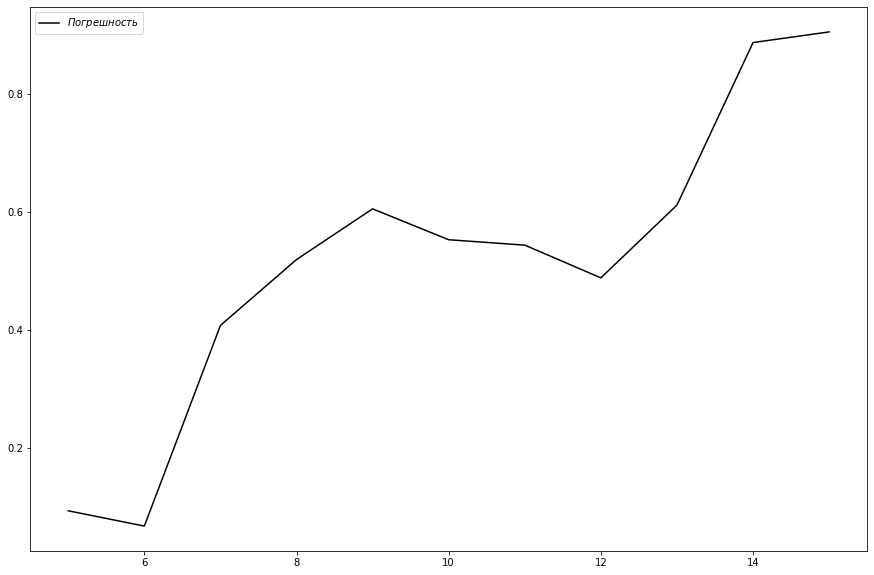

In [10]:
n_data=[]
for i in range(5,16):
    n_data.append(i)

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(n_data, dx1, label='$Погрешность$', color="black")
ax.legend()


### Вывод: 
С ростом размера матрицы погрешность увеличивается из-за роста числа итераций в методах решений.

#### Задача 3.2 
Дана система уравнений  Ax=b  порядка n с разреженной матрицей A. Решить систему прямым методом.



### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:

1. Для указанной в индивидуальном варианте системы уравнений вывести формулы для нахождения неизвестных. 
2. Предусмотреть компактное размещение элементов матрицы в памяти ЭВМ, используя одномерные массивы.
3. Подготовить тестовый пример.      
4. Решить систему для тестового примера и для  указанной в варианте системы уравнений.

$n = 40$; <br> На главной и на 12 наддиагонали элементы равны 24, в 12-ом столбце элементы равны 20. <br>

Реализуем функцию создания матрицы  $A$ и вектора $B$

In [11]:
def AInput(n):
    A = [ [0]*n for i in range(n) ]
    for i in range(n):
        A[i][i] = 24
        for j in range(n):
            if (i + 12) == j:
                A[i][j] = 24
            elif j == 12:
                A[i][j] = 20
    return A
A = AInput(40)
print(A)

[[24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 

In [12]:
def BInput(n):
    B = [0] * n
    for i in range(n):
        B[i] = (i+1)*np.exp(12/(i+1))*np.tan(i+1)
    return B
B = BInput(40)
print(B)

[253475.5693805541, -1763.015991538251, -23.34833263642643, 93.02184846833975, -186.3200658563093, -12.901566439668363, 33.87227253797901, -243.79354008250968, -15.443418559381593, 21.52633755286384, -7399.160640201118, -20.74135787431248, 15.15065398108862, 238.99854493172677, -28.57572522362055, 10.183015381742546, 120.31565719245965, -39.8733233918108, 5.416439405314684, 81.5274603194257, -56.80262033441161, 0.335996775664813, 61.5472458242332, -84.47639031074952, -5.394715210107338, 48.62280063477696, -137.85512502651247, -12.096340918925893, 38.91343895107391, -286.6689382718708, -20.165023310965722, 30.77625969182841, -3575.273244675033, -30.17137187332529, 23.365633417146377, 389.3995258654308, -43.026086294619056, 16.170539863517266, 191.7557716420803, -60.32329657852148]


## Решение системы:

1) Уравнения номера которых кратны 12 (12, 24, 36) образуют систему из трех уравнений и трех неизвестных. Из этой системы мы находим $X[12]$ (значение элемента, который располагается в столбце матрицы). <br>

2) Затем мы находим значения остальных элементов вектора $X$. Последние 12 уравнений и первое уравнение состоят из двух переменных. Т. к. одна из переменных это $X[12]$, достаточно просто выразить вторую переменную. Решаем эти уравнения в первую очередь (идем снизу вверх по строка матрицы). Остальные уравнения содержат три переменные, в каждом из которых, две переменные уже найдены. Следовательно, достаточно выразить третьи.<br>

Формула для уравнений с двумя переменными: <br>
$X[i] = (B[i] - (X[12] * A[i][12]))/A[i][i]$<br>

Формула для уравнений с тремя переменными:<br>
$X[i] = (B[i] - (X[12] * A[i][12]) - (X[i + 12] * A[i][i + 12])) / A[i][i]$<br>

Находим кол-во уравнений для поиска элемента $X[12]$. Их 3.

In [13]:
n = 40
M = n // 12

X12F = [[0]*M for i in range(M)]
B12 = [0] * M
for i in range(M):
    B12[i] = B[(i + 1)*12]
    for j in range(M):
        X12F[i][j] = A[(i + 1)*12][(j + 1)*12]
        
print(X12F, '\n'*2, B12)

[[20, 24, 0], [20, 24, 24], [20, 0, 24]] 

 [15.15065398108862, -5.394715210107338, -43.026086294619056]


Составляем СЛАУ для нахождения элемента $X[12]$

In [14]:
BB = 0
for i in range(M):
    BB = BB + B12[i] * ((-1)**(i))
    
X12 = BB/X12F[0][0]
print("X[12]: ", X12)

X[12]:  -1.124035855171155


Решаем изначальную СЛАУ с помощью формул, приведенных выше

In [15]:
X = [0]*n
X[12] = X12
for i in range(n - 1, -1, -1):
    if i >= (n - 12) or (i == 0):
        X[i] = (B[i] - (X[12] * A[i][12]))/A[i][i]
    elif i != 12:
        X[i] = (B[i] - (X[12] * A[i][12]) - (X[i + 12] * A[i][i + 12])) / A[i][i]
        
print("X: ", '\n', X)

X:  
 [10562.60609337826, -82.06509482077992, -13.515979336724945, 5.461074531091367, -10.21839862476133, -9.884019342346052, 1.2821469552134042, -11.336000983611827, -146.30972190819085, 0.5624869169707015, -308.95256397936595, 19.81730314188712, -1.124035855171155, 9.542791719328758, 13.479828689516472, -0.6484676322679146, 3.3917590933910726, 10.2831506200025, 1.0658942798450168, 2.114633359483221, 146.60294268085923, 1.2711403603745877, 1.5909005169619508, -19.74482984067418, 1.567973795187988, 1.3521775321358203, -13.733787361191366, 2.0094564858164827, 2.558089835604042, -11.00784254868532, 0.09648724135239058, 2.219040699802146, -148.03302198215042, -0.3204439487459247, 1.910264605023728, 17.16167679036891, -0.856057049633165, 1.610469040289182, 8.926520364395975, -1.576774144795766]


Тестовый пример: система $Ax = B$, где $B$ есть решения системы, в которой $X_i = N$. $N = 13$. Матрица $A$ - остается без изменений <br>

Составляем вектор $B$

In [16]:
B = BInput(40)
print(B)

[253475.5693805541, -1763.015991538251, -23.34833263642643, 93.02184846833975, -186.3200658563093, -12.901566439668363, 33.87227253797901, -243.79354008250968, -15.443418559381593, 21.52633755286384, -7399.160640201118, -20.74135787431248, 15.15065398108862, 238.99854493172677, -28.57572522362055, 10.183015381742546, 120.31565719245965, -39.8733233918108, 5.416439405314684, 81.5274603194257, -56.80262033441161, 0.335996775664813, 61.5472458242332, -84.47639031074952, -5.394715210107338, 48.62280063477696, -137.85512502651247, -12.096340918925893, 38.91343895107391, -286.6689382718708, -20.165023310965722, 30.77625969182841, -3575.273244675033, -30.17137187332529, 23.365633417146377, 389.3995258654308, -43.026086294619056, 16.170539863517266, 191.7557716420803, -60.32329657852148]


Составляем СЛАУ для поиска $X[12]$

In [17]:
X12F = [[0]*M for i in range(M)]
B12 = [0] * M
for i in range(M):
    B12[i] = B[(i + 1)*12]
    for j in range(M):
        X12F[i][j] = A[(i + 1)*12][(j + 1)*12]
print(X12F,'\n'*2, B12)

[[20, 24, 0], [20, 24, 24], [20, 0, 24]] 

 [15.15065398108862, -5.394715210107338, -43.026086294619056]


In [18]:
BB = 0
for i in range(M):
    BB = BB + B12[i] * ((-1)**(i))
X12 = BB/X12F[0][0]
print("X[12]: ", X12)

X[12]:  -1.124035855171155


Решаем тестовый пример согласно по формулам, выведенным выше

In [19]:
X = [0]*n
X[12] = X12
for i in range(n - 1, -1, -1):
    if i >= (n - 12) or (i == 0):
        X[i] = (B[i] - (X[12] * A[i][12]))/A[i][i]
    elif i != 12:
        X[i] = (B[i] - (X[12] * A[i][12]) - (X[i + 12] * A[i][i + 12])) / A[i][i]


print(X) 

[10562.60609337826, -82.06509482077992, -13.515979336724945, 5.461074531091367, -10.21839862476133, -9.884019342346052, 1.2821469552134042, -11.336000983611827, -146.30972190819085, 0.5624869169707015, -308.95256397936595, 19.81730314188712, -1.124035855171155, 9.542791719328758, 13.479828689516472, -0.6484676322679146, 3.3917590933910726, 10.2831506200025, 1.0658942798450168, 2.114633359483221, 146.60294268085923, 1.2711403603745877, 1.5909005169619508, -19.74482984067418, 1.567973795187988, 1.3521775321358203, -13.733787361191366, 2.0094564858164827, 2.558089835604042, -11.00784254868532, 0.09648724135239058, 2.219040699802146, -148.03302198215042, -0.3204439487459247, 1.910264605023728, 17.16167679036891, -0.856057049633165, 1.610469040289182, 8.926520364395975, -1.576774144795766]


**Все элементы вектора  𝑋  найдены корректно**

### Задача 3.3.
Решить задачу итерационным методом. указанным в индивидуальном варианте. Вектор правой части задается  как $b= Ax$, где $x_i=N$. <br>

Реализуем функцию создания матрицы $A$

In [20]:
m = 18
beta = (abs(66 - 13) + 5) * m


def AInput(m, beta):
    A = [ [0]*m for i in range(m) ]
    for i in range(m):
        for j in range(m):
            A[i][j] = (np.cos(i + j) / 0.1 * beta) + 0.1 * beta * np.exp(-1 * (i - j)**2)
    return A


print(AInput(m, beta))

[[10544.4, 5679.162686921678, -4342.660820852182, -10335.508780525102, -6824.039390067436, 2961.4332162375317, 10024.17779262982, 7870.7395353441, -1519.0203529619253, -9512.199934076027, -8759.906763558163, 46.20428699525019, 8809.835329167217, 9473.744398340048, 1427.5365580897828, -7931.141810246094, -9997.964974576134, -2872.7052492586718], [5679.162686921678, -4240.172973552167, -10297.11505085035, -6822.127249116124, 2961.4461002196285, 10024.177804378493, 7870.7395353455495, -1519.0203529619253, -9512.199934076027, -8759.906763558163, 46.20428699525019, 8809.835329167217, 9473.744398340048, 1427.5365580897828, -7931.141810246094, -9997.964974576134, -2872.7052492586718, 6893.706434068197], [-4342.660820852182, -10297.11505085035, -6719.639401816109, 2999.8398298943807, 10026.089945329804, 7870.752419327647, -1519.020341213253, -9512.199934074577, -8759.906763558163, 46.20428699525019, 8809.835329167217, 9473.744398340048, 1427.5365580897828, -7931.141810246094, -9997.96497457613

Реализуем функцию для создания матриц коэффициентов  $B_1$  и  $B_2$  необходимы для решения СЛАУ методом Зейделя

In [21]:
def BMatrInput(A, m):
    B1 = [ [0]*m for i in range(m) ]
    B2 = [ [0]*m for i in range(m) ]
    for i in range(m):
        for j in range(m):
            if i > j:
                B1[i][j] = -1 * A[i][j] / A[i][i]
            elif i < j:
                B2[i][j] = -1 * A[i][j] / A[i][i]
    return B1, B2

Расчитываем матрицы $А$, $В_1$, $В_2$ и $В_0$, как сумму матриц $В_1$ и $В_2$

In [22]:
A = AInput(m, beta)
B1, B2 = BMatrInput(A, 18)
B0 = [ [0]*m for i in range(m) ]
for i in range(m):
    for j in range(m):
        B0[i][j] = B1[i][j] + B2[i][j]

Находим эвклидову норму матрицы для проверки критерия сходимости метода Зейделя.

In [23]:
print(NormE(B1, m, m) + NormE(B2, m, m))

54.94686660130125


Как мы видим, критерий сходимости не выполняется (сумма норм больше $1$). **Следовательно метод не сходится**.

Расчитываем вектор  $B$

In [24]:
B = BInput(m)
print(B)

[253475.5693805541, -1763.015991538251, -23.34833263642643, 93.02184846833975, -186.3200658563093, -12.901566439668363, 33.87227253797901, -243.79354008250968, -15.443418559381593, 21.52633755286384, -7399.160640201118, -20.74135787431248, 15.15065398108862, 238.99854493172677, -28.57572522362055, 10.183015381742546, 120.31565719245965, -39.8733233918108]


Реализуем функцию для решения системы с помощью метода Зейделя

In [25]:
def Sol(B1, B2, eps, B, m, indend):
    X0 = [0] * m
    X1 = [0] * m
    XX = [0] * m
    index = 0
    for i in range(m):
        X1[i] = X1[i] + B[i] / A[i][i]
        for j in range(m):
            if i > j:
                X1[i] = X1[i] + B1[i][j]*X1[j]
            elif j > i:
                X1[i] = X1[i] + B2[i][j]*X1[j]
    for i in range(m):
        XX[i] = abs(X1[i] - X0[i])
    index += 1
    while (((max(XX)) > (((1 - NormE(B0, m, m))/NormE(B2, m, m)) * eps)) and (index < indend)):
        X0 = X1
        for i in range(m):
            X1[i] = X1[i] + B[i] / A[i][i]
            for j in range(m):
                if i > j:
                    X1[i] = X1[i] + B1[i][j]*X1[j]
                elif j > i:
                    X1[i] = X1[i] + B2[i][j]*X1[j]
        for i in range(m):
            XX[i] = abs(X1[i] - X0[i])
        index += 1
    return X1

Задаем матрицы $B_1$, $B_2$, $B$, точность, размерность и максимальное кол-во итераций

In [26]:
print(Sol(B1, B2, 0.001, B, 18, 1))

print(Sol(B1, B2, 0.001, B, 18, 3))

print(Sol(B1, B2, 0.001, B, 18, 10))

print(Sol(B1, B2, 0.001, B, 18, 50))

[24.038880294806162, 32.61275633322389, -65.50748233162035, 65.9073190906769, -143.35175967588037, 131.7798915162446, -138.74785752293465, -13.369782860795226, 12.422417290837327, -13.166858994569493, 6.724178080617769, -7.579257750149864, 7.817264112039828, -6.186799232389586, 6.535582576265462, -11.100875902041619, 9.727600613051333, -10.732019009807942]
[173.28308047870158, 371.7363874962725, -1068.5871559105503, 1123.1681584182616, -2091.0946244072093, 2427.457791087389, -2399.24710082334, 377.11977486768785, 480.93013834449755, -470.32226488471576, 302.98924812050456, -268.4436172138337, 302.72651686212976, -250.09077604708017, 247.32572688540543, -378.30383216265443, 371.35028248673586, -392.73761199353936]
[144122.8449890375, 106276.87854686817, -758385.1696501381, 1046496.1351392013, 255315.26156196566, -766366.689212687, 988770.7508239354, -986192.892284954, 2127398.1905321977, -1492990.2024897954, -99429.41431806146, 927707.6539302947, -640835.1044744725, 297339.20387539366, 

### Вывод:
Можно заметить, что с увеличением максимального числа итераций решение не приближается к  вектору $[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]$,  а следовательно, метод действительно не сходится.